In [4]:
print("Hello world!")

Hello world!


## Init dataset

In [6]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm # Colormaps
from matplotlib.colors import colorConverter, ListedColormap

sns.set_style('darkgrid')
np.random.seed(seed=42)

In [7]:
nb_of_sample_per_class = 20
red_mean = (-1, 0.0)
blue_mean = (1, 0.0)

x_red = np.random.randn(nb_of_sample_per_class, 2) + red_mean
x_blue = np.random.randn(nb_of_sample_per_class, 2) + blue_mean

In [8]:
features = np.vstack((x_red, x_blue))
target = np.vstack((np.zeros((nb_of_sample_per_class, 1)), np.ones((nb_of_sample_per_class, 1))))

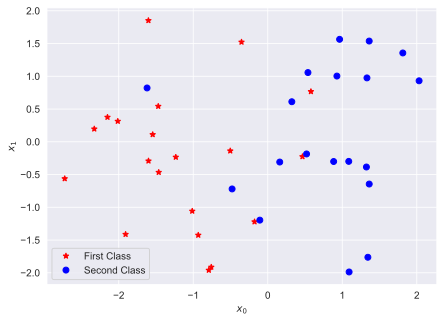

In [9]:
plt.figure(figsize=(7, 5))
plt.plot([w[0] for w in features[0:20]], [w[1] for w in features[0:20]], 'r*', label="First Class")
plt.plot([w[0] for w in features[21:40]], [w[1] for w in features[21:40]], 'bo', label="Second Class")
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.legend()
plt.show()

In [10]:
def logistic(z):
    return 1.0/(1 + np.exp(-z))

In [11]:
def nn(x, w):
    return logistic(x.dot(w.T))

In [12]:
def nn_predict(x, w):
    return np.around(nn(x, w))

In [13]:
def loss(y, t):
    return -np.mean(
        np.multiply(t, np.log(y)) + np.multiply((1-t), np.log(1-y))
    )

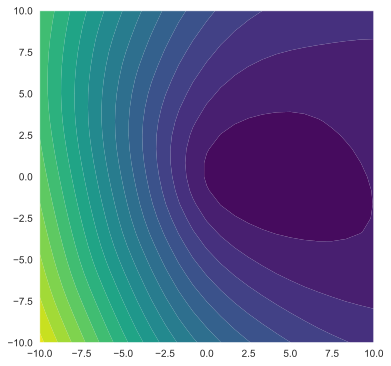

In [14]:
nb_of_ws = 25
wsa = np.linspace(-10, 10, num=nb_of_ws)
wsb = np.linspace(-10, 10, num=nb_of_ws)

ws_x, ws_y = np.meshgrid(wsa, wsb)
loss_ws = np.zeros((nb_of_ws, nb_of_ws))

for i in range(nb_of_ws):
    for j in range(nb_of_ws):
        loss_ws[i, j] = loss(
            nn(features, np.asmatrix([ws_x[i,j], ws_y[i,j]])), target)


plt.figure(figsize=(6, 6))
plt.contourf(ws_x, ws_y, loss_ws, 20, cmap=cm.viridis)
plt.show()

In [15]:
def gradient(w, x, t):
    return (nn(x, w) - t).T * x

In [16]:
def delta_w(w_k, x, t, learning_rate=0.05):
    return learning_rate*gradient(w_k, x, t)

In [17]:
w = np.asmatrix([-4, -2])
np_of_iterations = 5
w_iter = [w]

In [18]:
for i in range(np_of_iterations):
    dw = delta_w(w, features, target)
    print("Delta w:", dw)
    w = w - dw
    w_iter.append(w)

Delta w: [[-2.09129627 -0.57790238]]
Delta w: [[-1.92372462 -0.65431106]]
Delta w: [[-1.07299032 -0.55916788]]
Delta w: [[-0.27444743 -0.16378623]]
Delta w: [[-0.15860338 -0.07871074]]


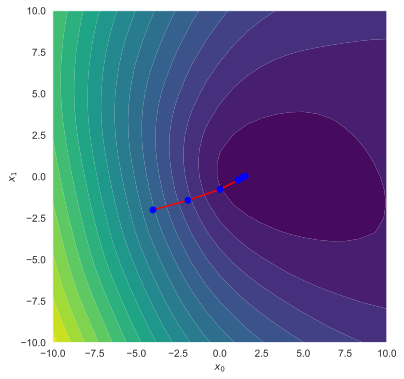

In [19]:
plt.figure(figsize=(6, 6))
plt.contourf(ws_x, ws_y, loss_ws, 20, cmap=cm.viridis)
plt.plot([x[0][0, 0] for x in w_iter], [x[0][0, 1] for x in w_iter], 'r')
plt.plot([x[0][0, 0] for x in w_iter], [x[0][0, 1] for x in w_iter], 'bo')
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")

plt.show()

/var/folders/n0/bg9tqt7x72v2_mzhspj3kl600000gn/T/ipykernel_24460/1461001041.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  classification_plane[i,j] = nn_predict(


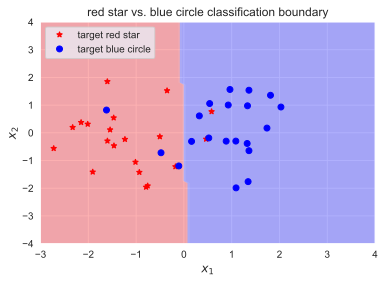

In [20]:
plt.figure(figsize=(6, 4))
# Generate a grid over the input space to plot the color of the
#  classification at that grid point
nb_of_xs = 100
xsa = np.linspace(-4, 4, num=nb_of_xs)
xsb = np.linspace(-4, 4, num=nb_of_xs)
xx, yy = np.meshgrid(xsa, xsb) # create the grid
# Initialize and fill the classification plane
classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        classification_plane[i,j] = nn_predict(
            np.asmatrix([xx[i,j], yy[i,j]]) , w)
# Create a color map to show the classification space
cmap = ListedColormap([
        colorConverter.to_rgba('r', alpha=0.3),
        colorConverter.to_rgba('b', alpha=0.3)])

# Plot the classification plane with decision boundary and input samples
plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.plot(x_red[:,0], x_red[:,1], 'r*', label='target red star')
plt.plot(x_blue[:,0], x_blue[:,1], 'bo', label='target blue circle')
plt.legend(loc=2)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.title('red star vs. blue circle classification boundary')
plt.axis([-3, 4, -4, 4])
plt.show()